유클리드 거리
  - 좌표에서 두 점 사이의 직선의 거리
  - d = √((x₂ - x₁)² + (y₂ - y₁)²)
  - 분류 및 군집화 문제에 기본적으로 사용되는 알고리즘

비지도학습
  - 타겟이 없다
  - 클러스터링(군집화)
  - K-means(클러스터의 수를 미리 정함)
    - 데이터 속성에따라서 하위그룹의 K개로 분할 ,반복하면서 k개를 구분하는 중심점을 업데이트

In [251]:
url = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/cluster_22.csv'

In [252]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics

In [253]:
# 현재 가상환경의 셋팅환경을 requirement.txt 파일로 저장
!pip freeze > requirement.txt

In [254]:
# 파일에 정의된 라이브러리 목록 및 버전을 로드할때
# !pip install -r requirement.txt

Kmeans VS k-neighbors 둘 의 차이점을 확인

데이터 로드

In [255]:
df = pd.read_csv(url, header=None)
df.head()

,0,1
0,2.08,1.05
1,2.05,7.70
2,4.53,5.49
3,6.23,1.02
4,5.35,7.86


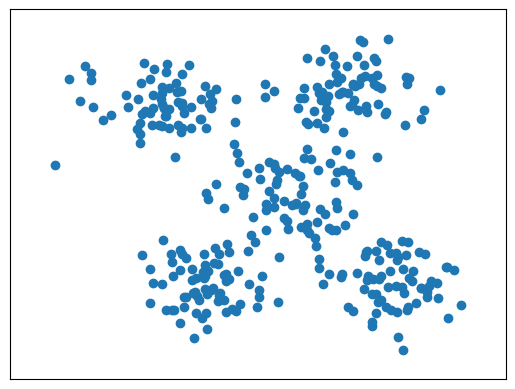

In [256]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1])
x_min, x_max = df.iloc[:,0].min()-1, df.iloc[:,0].max()+1
y_min, y_max = df.iloc[:,1].min()-1, df.iloc[:,1].max()+1
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.xticks([])
plt.yticks([])
plt.show()

비지도학습 모델선택
  - Kmeans()

In [257]:
n_clusters = 5
# n_init 알고리즘이 최상의 결과를 결정할때까지 실행하는 반복 횟수
km = KMeans(n_clusters=n_clusters,n_init = 10)
km.fit(df)

KMeans(n_clusters=5, n_init=10)

In [258]:
step_size = 0.01
x_min, x_max = df.iloc[:,0].min()-1, df.iloc[:,0].max()+1
y_min, y_max = df.iloc[:,1].min()-1, df.iloc[:,1].max()+1
x_vals, y_vals= np.meshgrid(np.arange(x_min,x_max,step_size), np.arange(y_min,y_max,step_size))

In [259]:
np.c_[x_vals.ravel(),y_vals.ravel()]

array([[-1.4 , -1.29],
       [-1.39, -1.29],
       [-1.38, -1.29],
       ...,
       [ 9.6 , 11.31],
       [ 9.61, 11.31],
       [ 9.62, 11.31]])

In [260]:
# 그리드에 대한 포인트의 출력 레이블 결정
output = km.predict(np.c_[x_vals.ravel(),y_vals.ravel()])

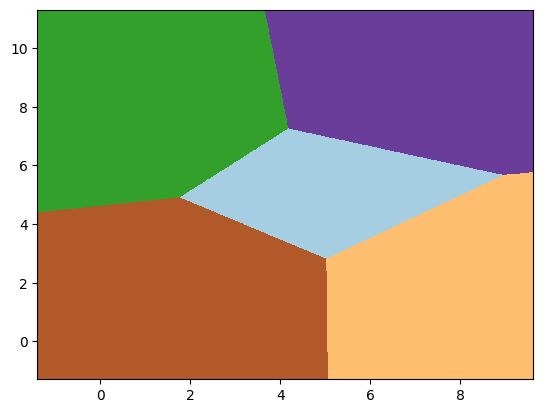

In [261]:
# 각 영역을 칠함
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest', 
           extent = (x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto',
           origin='lower'
           )

In [262]:
# 영역위 에 입력데이터를 overlay

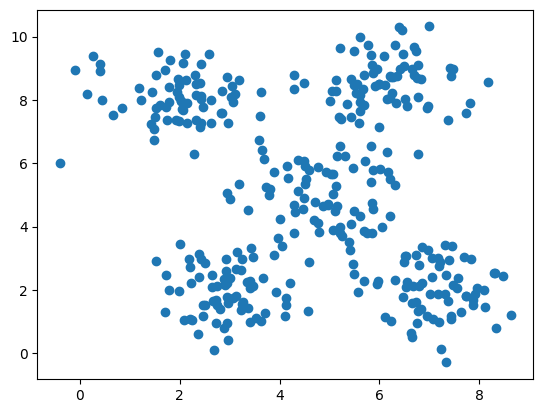

In [263]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [264]:
# k평균 알고리즘을 이용해서 클러스터 중심

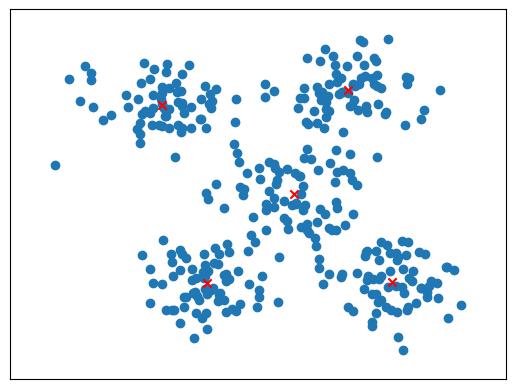

In [265]:
cluster_center = km.cluster_centers_
plt.scatter(df.iloc[:,0],df.iloc[:,1])
x_min, x_max = df.iloc[:,0].min()-1, df.iloc[:,0].max()+1
y_min, y_max = df.iloc[:,1].min()-1, df.iloc[:,1].max()+1
plt.scatter(cluster_center[:,0],cluster_center[:,1],c='red', marker = 'x')

plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.xticks([])
plt.yticks([])
plt.show()

과제 : 위에서 설정한 클러스터 수를 변경해서 시각화 및 중심점 그리기

평균이동(Mean Shift) 알고리즘을 이용한 군집 수 측정하기
  - 비모수 알고리즘
    - 기본 분포에대한 가정을 하지 않음
    - 기본데이터가 표준 확률 분포를 따른다고 가정하는 모수(parametics) 알고지름의 반대개념
  - 객체 탐지나 실시간 데이터 분석 같은 분야에 적용


In [266]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [267]:
df.head()

,0,1
0,2.08,1.05
1,2.05,7.70
2,4.53,5.49
3,6.23,1.02
4,5.35,7.86


In [268]:
# 입력데이터의 대역폭을 추정
# 대역폭은 평균이동 알고리즘의 기본 커널밀도 추정 프로세스
# x의 대역폭을 추정
x = df.to_numpy()
bandwid_x = estimate_bandwidth(x, quantile=0.1, n_samples=len(x))

In [269]:
# 추정한 대역폭을 이용해서 평균이동 클러스터링 훈련
# MeanShift 를 이용해서 데이터 클러스터링
meanshift_model = MeanShift(bandwidth=bandwid_x,bin_seeding=True)
meanshift_model.fit(x)

MeanShift(bandwidth=1.3044799765090382, bin_seeding=True)

In [270]:
# 클러스터의 중심 추출
cluster_centers = meanshift_model.cluster_centers_
cluster_centers

array([[2.95568966, 1.95775862],
       [7.20690909, 2.20836364],
       [2.17603774, 8.03283019],
       [5.97960784, 8.39078431],
       [4.99466667, 4.65844444]])

In [271]:
# 클러스터의 수 추출
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
num_clusters, np.unique(labels)

(5, array([0, 1, 2, 3, 4]))

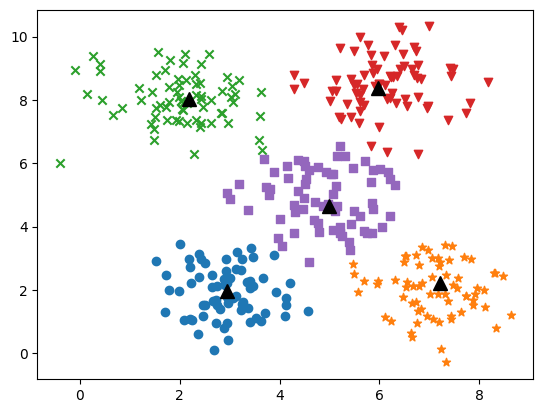

In [272]:
# 포인터와 클러스터 중심을 시각화
plt.figure()
markers = 'o*xvs'
for i, m in (zip(range(num_clusters), markers)):
  # 현재 클러스터에 속한 포인트
  plt.scatter(x[labels==i,0], x[labels==i,1], marker=m )
  # 클러스터의 중심
  c_c =  cluster_centers[i]
  plt.plot(c_c[0],c_c[1],marker='^', color = 'black', markersize=10)
plt.show()

실루엣
  - 데이터에서 클러스터의 일관성을 확인하는 방법
  - 각 데이터 포인트가 클러스터와 얼마나 잘 맞는지에 대한 추청치 - 실루엣 점수
  - 실루엣점수 
    - 데이터 포인트와 자체클러서의 유사성을 다른 클러스터와 비교해 측정
    - (p-q)/max(p,q)
      - p : 데이터 포인트가 속하지 않은 가장 가까운 클러스터의 포인트들까지의 평균 거리
      - q : 클러스터의 모든 포인트에 대한 평균 거리
      - -1 ~ 1 사이가 됨
      - 점수를 구했더니 마이너스가 많이 나온다면 데이터에서 클러스터가 너무 적거나 많다는 의미이고 최적의 클러스터 수를 다시 찾아야 함
      - 이상적인 case는 값이 큰 양수

In [273]:
url = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/quality_22.csv'

In [274]:
x = pd.read_csv(url,header=None).to_numpy()

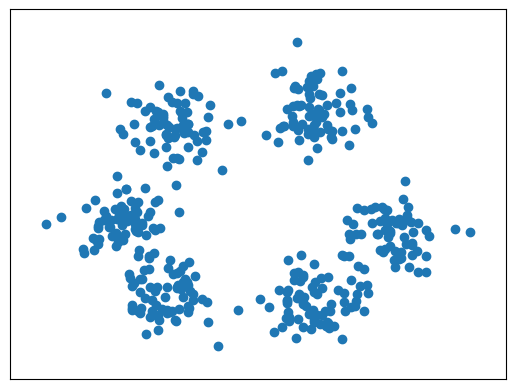

In [275]:
plt.scatter(x[:,0],x[:,1])
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
plt.xlim(x_min, x_max)
plt.ylim(y_min,y_max)
plt.xticks([])
plt.yticks([])
plt.show()

In [276]:
# 클러스터의 개수를 2 ~ 10 개로 각각 설정해서 확인
cluster_list = np.arange(2,10)
scores = []
for num in cluster_list:
  km = KMeans(n_clusters=num, n_init=10)
  km.fit(x)
  # 실루엣점수를 추정(유클리안거리)
  score = metrics.silhouette_score(x,km.labels_, sample_size=len(x))
  # 점수 출력
  print(f'number of cluster : {num} / silhouette score : {score}')  
  scores.append(score)

number of cluster : 2 / silhouette score : 0.47762624870454473
number of cluster : 3 / silhouette score : 0.5471742411734871
number of cluster : 4 / silhouette score : 0.579480188968759
number of cluster : 5 / silhouette score : 0.5890032635647954
number of cluster : 6 / silhouette score : 0.6096904118954452
number of cluster : 7 / silhouette score : 0.5531506134707689
number of cluster : 8 / silhouette score : 0.49748778500124613
number of cluster : 9 / silhouette score : 0.4726933195301614


In [277]:
# 최적의 점수와 클러스터의 수
np.max(scores), cluster_list[ np.argmax(scores) ]

(0.6096904118954452, 6)

In [278]:
# 클러스터 수와 점수에 대한 시각화

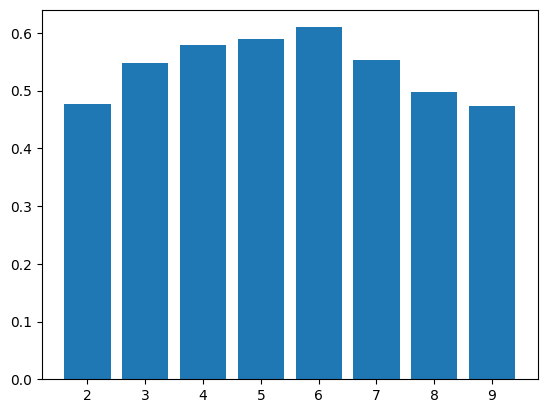

In [279]:
plt.bar(cluster_list,scores)
plt.show()

가우시안 혼합 모델(GMM, Gaussian Mixture Model )
  - 혼합모델
    - 데이터가 여러 구성요소 분포에 의해 처리된다고 가정하는 확률 밀도 모델 유형, 이때 분포가 가우시간이면 모델은 가우시안 혼합 모델

In [280]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold, train_test_split
# StratifiedKFold 클래스의 비율을 유지하면서 나눈다.
from sklearn.datasets import load_iris

In [281]:
# iris데이터로 가우시안 혼합모델을 적용

In [282]:
x,y = load_iris(return_X_y=True)

In [283]:
# x[:,[0,2]]

In [284]:
stf = StratifiedKFold() # 기본값이 k = 5
x_train,x_test,y_train,y_test = train_test_split(x[:,[0,2]],y,random_state=100)

In [285]:
num_class = len(np.unique(y))
num_class

3

가우시간 혼합 모델 생성

In [286]:
classifier =  GaussianMixture(n_components=3,covariance_type='full',
                              init_params='kmeans',max_iter=200)
# GMM 평균 초기화
# classifier.means_ = np.array(  [  x_train[y_train ==i].mean(axis=0) for i in range(num_class) ]  )

In [287]:
# 훈련
classifier.fit(x_train)

GaussianMixture(max_iter=200, n_components=3)

In [288]:
y_train_predict = classifier.predict(x_train)
# 넘파이 배열을 비교해서 정확도를 구해본다.
(y_train == y_train_predict).sum() / len(y_train_predict)

0.4017857142857143

In [289]:
y_test_predict = classifier.predict(x_test)
# 넘파이 배열을 비교해서 정확도를 구해본다.
(y_test == y_test_predict).sum() / len(y_test_predict)

0.4473684210526316

In [290]:
# 아이리스 분류기
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier(n_neighbors=3)
kc.fit(x_train,y_train)
predict = kc.predict(x_test)
(y_test == predict).sum() / len(predict)

1.0

In [291]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x_train)
predict = km.predict(x_train)
(y_train == predict).sum() / len(predict)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8839285714285714

In [292]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
gm.fit(x_train)
predict = km.predict(x_train)
(y_train == predict).sum() / len(predict)

0.8839285714285714